# 03. MVPs
A number of simple models to test initial assumptions

In [2]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from modules.fm_functions import *
predict_columns = FM_columns[2:]

Load data

In [5]:
import pandas as pd
combined_data = pd.read_csv('./data/combined_data.csv', index_col='Name').iloc[:, 1:].dropna(axis=0)

In [6]:
combined_data.head()

,team_cluster,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
Name,,,,,,,,,,,,,,,,,,,,,
Youcef Belaïli,1,0.513527,0.512050,0.419222,0.099565,0.609974,0.616573,0.164482,0.033113,0.005737,...,12,11,14,14,12,9,12,14,13,11
Romain Hamouma,1,0.437854,0.242553,0.134042,0.106117,0.216704,0.219048,0.070122,0.000000,0.000000,...,13,6,14,14,12,8,13,13,12,12
Youssouf Koné,1,0.580240,1.000000,1.000000,1.000000,0.340354,0.000000,0.495600,0.674216,0.201548,...,14,10,14,12,12,9,14,14,15,13
Thomas Mangani,1,0.975392,0.785929,0.615300,0.401151,0.877716,0.266163,0.681635,0.298842,0.131353,...,17,13,12,11,14,12,14,11,15,14
Riad Nouri,1,0.279058,0.405789,0.341717,0.157807,0.460373,0.279212,0.335181,0.094644,0.024060,...,12,6,13,15,12,8,14,13,12,11


In [37]:
X = combined_data[all_stats_columns]
y = combined_data[predict_columns]

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MVP: simple NN

In [38]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the target values
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.833527616325961


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from modules.fm_functions import *

In [47]:
X[X.index.str[:5]=='Jean-']

,defense_Blocks_Blocks,defense_Tackles_Tkl,defense_Tackles_TklW,defense_Tackles_Def 3rd,defense_Tackles_Mid 3rd,defense_Tackles_Att 3rd,defense__Int,defense__Clr,possession_Touches_Def Pen,possession_Touches_Def 3rd,...,gca_SCATypes_PassLive,gca_SCATypes_PassDead,shooting_Standard_Dist,shooting_Expected_npxG,playingtime_PlayingTime_Min,misc_Performance_Fls,misc_Performance_Fld,misc_Performance_Off,misc_AerialDuels_Won,misc_AerialDuels_Lost
Name,,,,,,,,,,,,,,,,,,,,,
Jean-Kevin Duverne,0.677266,0.816642,0.760137,0.880159,0.457047,0.251292,0.440203,0.487119,0.108092,0.487412,...,0.379565,0.108968,0.175082,0.039212,0.652304,0.693622,0.334883,0.156819,0.129487,0.133777
Jean-Philippe Mateta,0.153447,0.263950,0.068344,0.174630,0.273377,0.153247,0.166234,0.307998,0.057054,0.025515,...,0.142805,0.000000,0.286930,1.000000,0.091587,0.705122,0.308720,1.000000,1.000000,1.000000
Jean-Paul Boëtius,1.000000,0.619187,0.646857,0.490881,0.405306,0.437143,0.435385,0.162595,0.064406,0.299347,...,0.519168,0.076254,0.389165,0.119192,0.164491,0.579649,1.000000,0.000000,0.060127,0.229692
Jean-Victor Makengo,0.342447,0.382805,0.338635,0.186536,0.585056,0.145489,0.427270,0.154923,0.063905,0.288247,...,0.587615,0.000000,1.000000,0.017124,0.118593,0.526217,0.605568,0.000000,0.107792,0.098810
Jean-Charles Castelletto,0.672029,0.432201,0.388110,0.490020,0.326999,0.124805,0.866982,0.583042,0.185993,0.655390,...,0.240785,0.000000,0.000000,0.072403,0.716890,0.361375,0.277649,0.000000,0.720704,0.313682
Jean-Clair Todibo,0.787815,0.539946,0.592208,0.609146,0.343810,0.125137,0.542799,0.989547,0.304361,1.000000,...,0.124250,0.000000,0.011918,0.044599,0.845739,0.362528,0.214783,0.038875,0.362569,0.315666
Jean-Eudes Aholou,0.784856,0.673153,0.543596,0.393511,0.837179,0.436615,0.611838,0.204559,0.061637,0.234257,...,0.459112,0.051605,0.564687,0.183279,0.233827,0.958537,0.573884,0.116559,0.279149,0.252298
Jean-Ricner Bellegarde,0.438663,0.491979,0.354380,0.303536,0.472406,0.645267,0.338920,0.161235,0.033532,0.199760,...,0.781185,0.610134,0.178896,0.213408,0.638236,0.475504,1.000000,0.062640,0.090588,0.225980


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


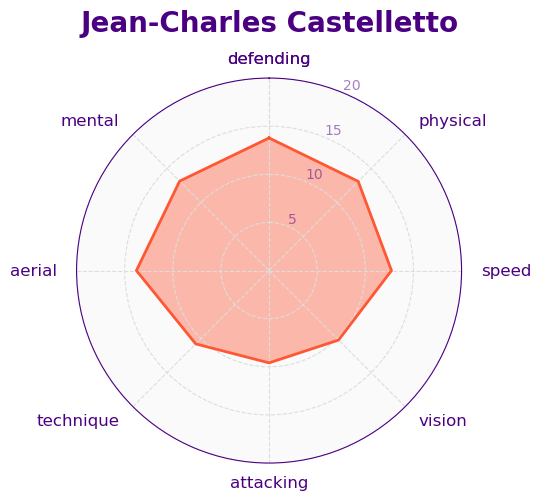

In [54]:
test_name = 'Jean-Charles Castelletto'

predictions = mlp.predict(X.loc[[test_name]].values)

test = pd.Series(predictions[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)

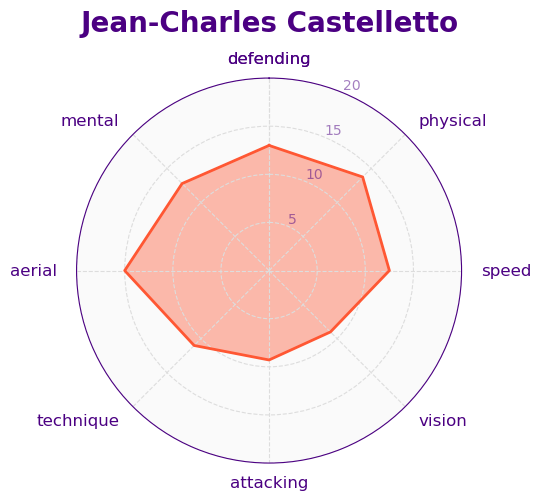

In [55]:
real = y.loc[[test_name]].values

test = pd.Series(real[0], index=y.columns)
test['Name'] = test_name
test = calculate_skill_nodes(test)
plot_fm_radar(test, gk=False)